In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [10]:
ocean_data=xr.open_dataset("/Users/loganknudsen/Documents/GitHub/BottomBoundaryLayer/longrun_PSI.nc")
v = ocean_data.v
b = ocean_data.B
ocean_data.time

<xarray.DataArray 'time' (time: 3)>
array([            0,  500000000000, 1000000000000], dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:08:20 00:16:40
Attributes:
    longname:  Time

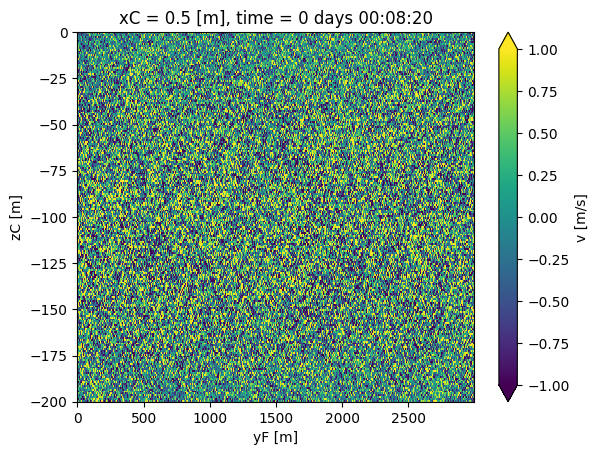

In [25]:
v[1].plot(vmin=-1,vmax=1)

b[1].plot()